In [1]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import IPython
import pywt

# Se cargan los audios

In [2]:
IPython.display.Audio('C:/Users/alvar/Documents/Maestria en Ciencia de datos/Procesamiento y clasificación de datos/Tarea 7 & 8/Tony True - Me Gustas (Audio).mp3')

In [3]:
IPython.display.Audio('C:/Users/alvar/Documents/Maestria en Ciencia de datos/Procesamiento y clasificación de datos/Tarea 7 & 8/Tony True - Me Gustas (Versión Karaoke).mp3')

In [4]:
cancion, sr_cancion = librosa.load('C:/Users/alvar/Documents/Maestria en Ciencia de datos/Procesamiento y clasificación de datos/Tarea 7 & 8/Tony True - Me Gustas (Audio).mp3')

In [5]:
karaoke, sr_karaoke = librosa.load('C:/Users/alvar/Documents/Maestria en Ciencia de datos/Procesamiento y clasificación de datos/Tarea 7 & 8/Tony True - Me Gustas (Versión Karaoke).mp3')

# Se grafica la amplitud de los audios y se puede observar que la canción tiene muchas mas variaciones mientras que el karaoke se ve un poco mas estable

Muestra 1: Duración: 1.05 segundos
Muestra 2: Duración: 1.03 segundos


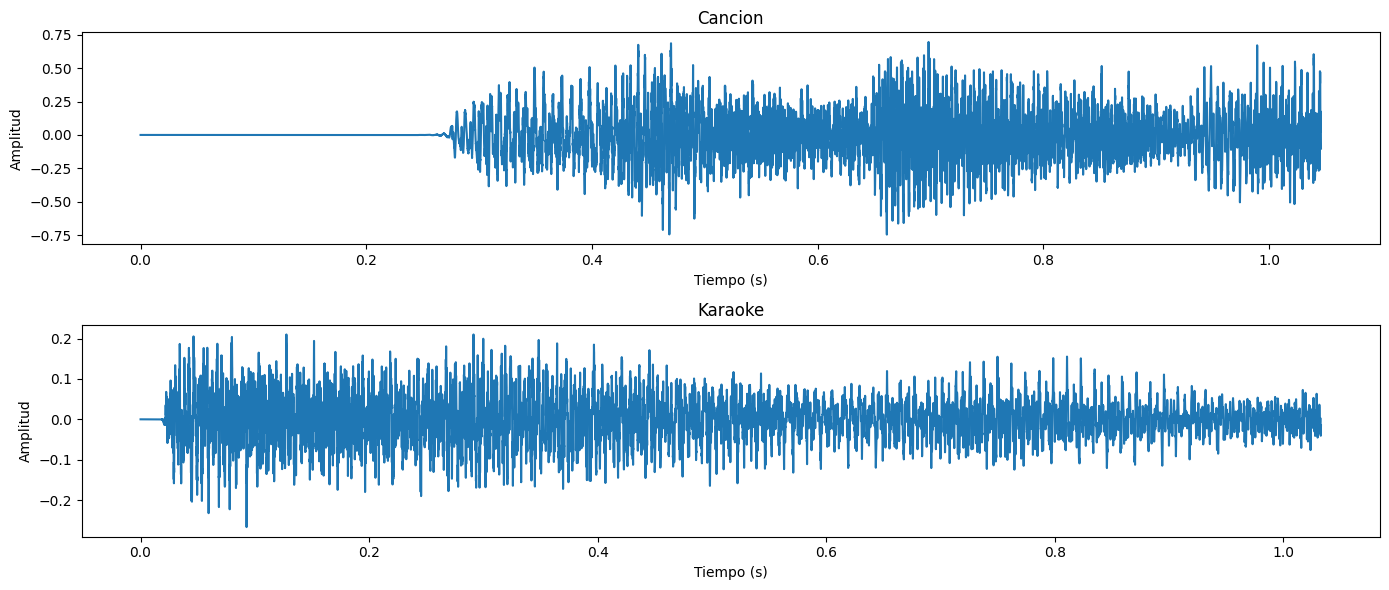

In [ ]:
# Mostrar información básica de las muestras
print(f'Cancion: Duración: {len(cancion) / sr_cancion:.2f} segundos')
print(f'Karaoke: Duración: {len(karaoke) / sr_karaoke:.2f} segundos')

# Visualizar las ondas de las muestras de audio
plt.figure(figsize=(14, 6))

plt.subplot(2, 1, 1)
plt.plot(np.linspace(0, len(cancion) / sr_cancion, len(cancion)), cancion)

plt.title('Cancion')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')

plt.subplot(2, 1, 2)
plt.plot(np.linspace(0, len(karaoke) / sr_karaoke, len(karaoke)), karaoke)
plt.title('Karaoke')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')

plt.tight_layout()
plt.show()

# Se grafican diversos niveles de ondiculas y se puede observar que si hay diferencias entre las 2 pistas esto debido a que la canción incluye la voz del artista, ocacionando que en las graficas de la canción haya mas variaciones.

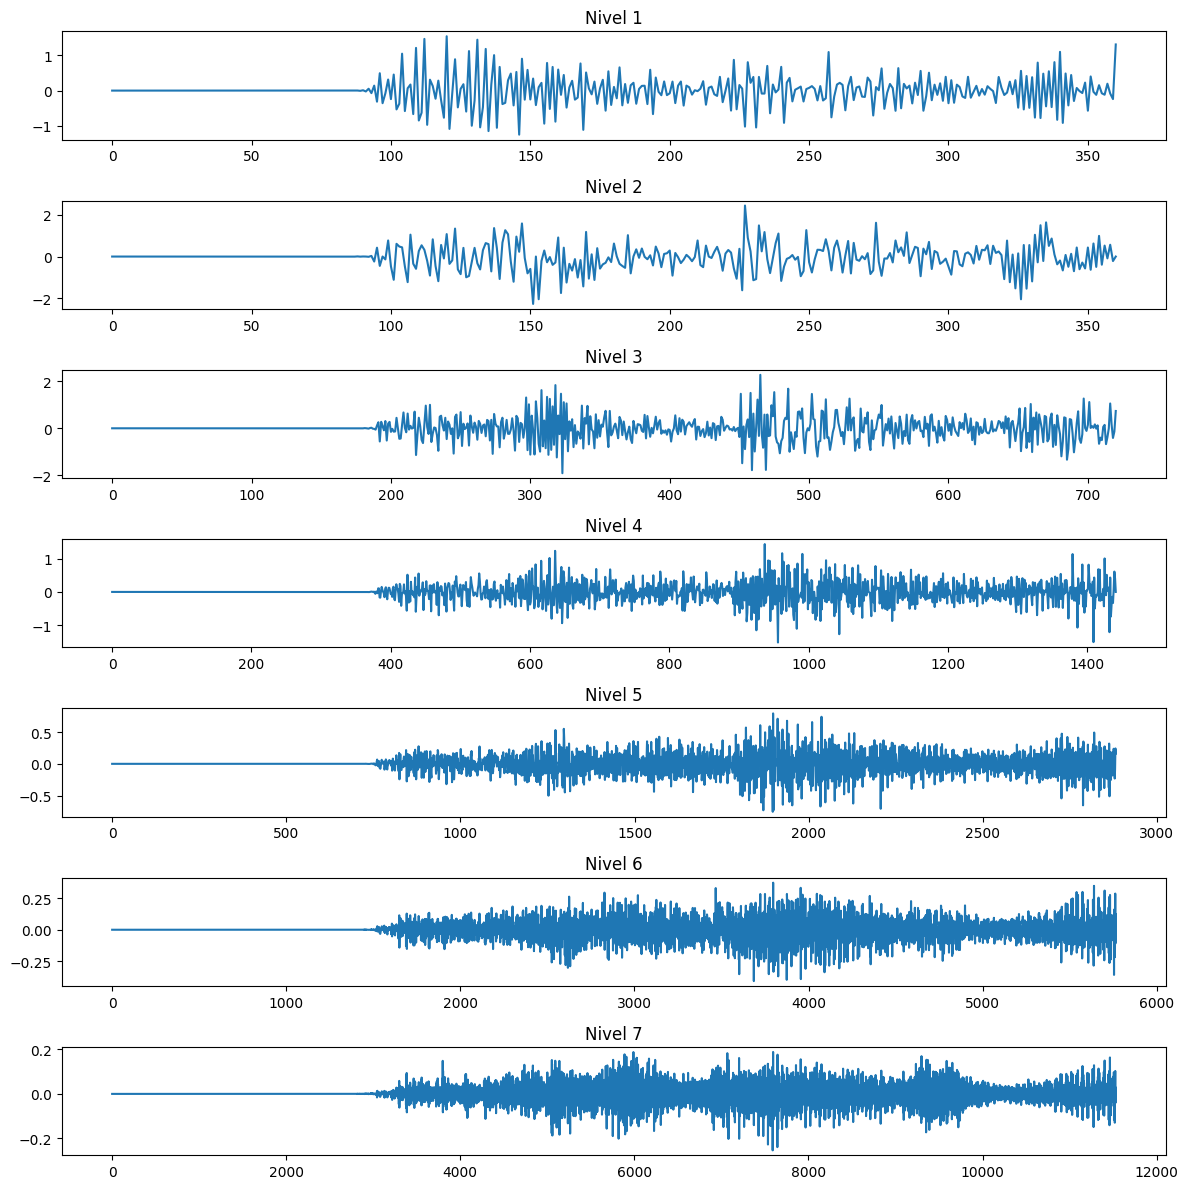

In [7]:
coeffs = pywt.wavedec(cancion, 'db1', level=6)

# Visualización de la descomposición
fig, axs = plt.subplots(len(coeffs), 1, figsize=(12, 12))
for i, coeff in enumerate(coeffs):
    axs[i].plot(coeff)
    axs[i].set_title(f'Nivel {i+1}')
plt.tight_layout()
plt.show()

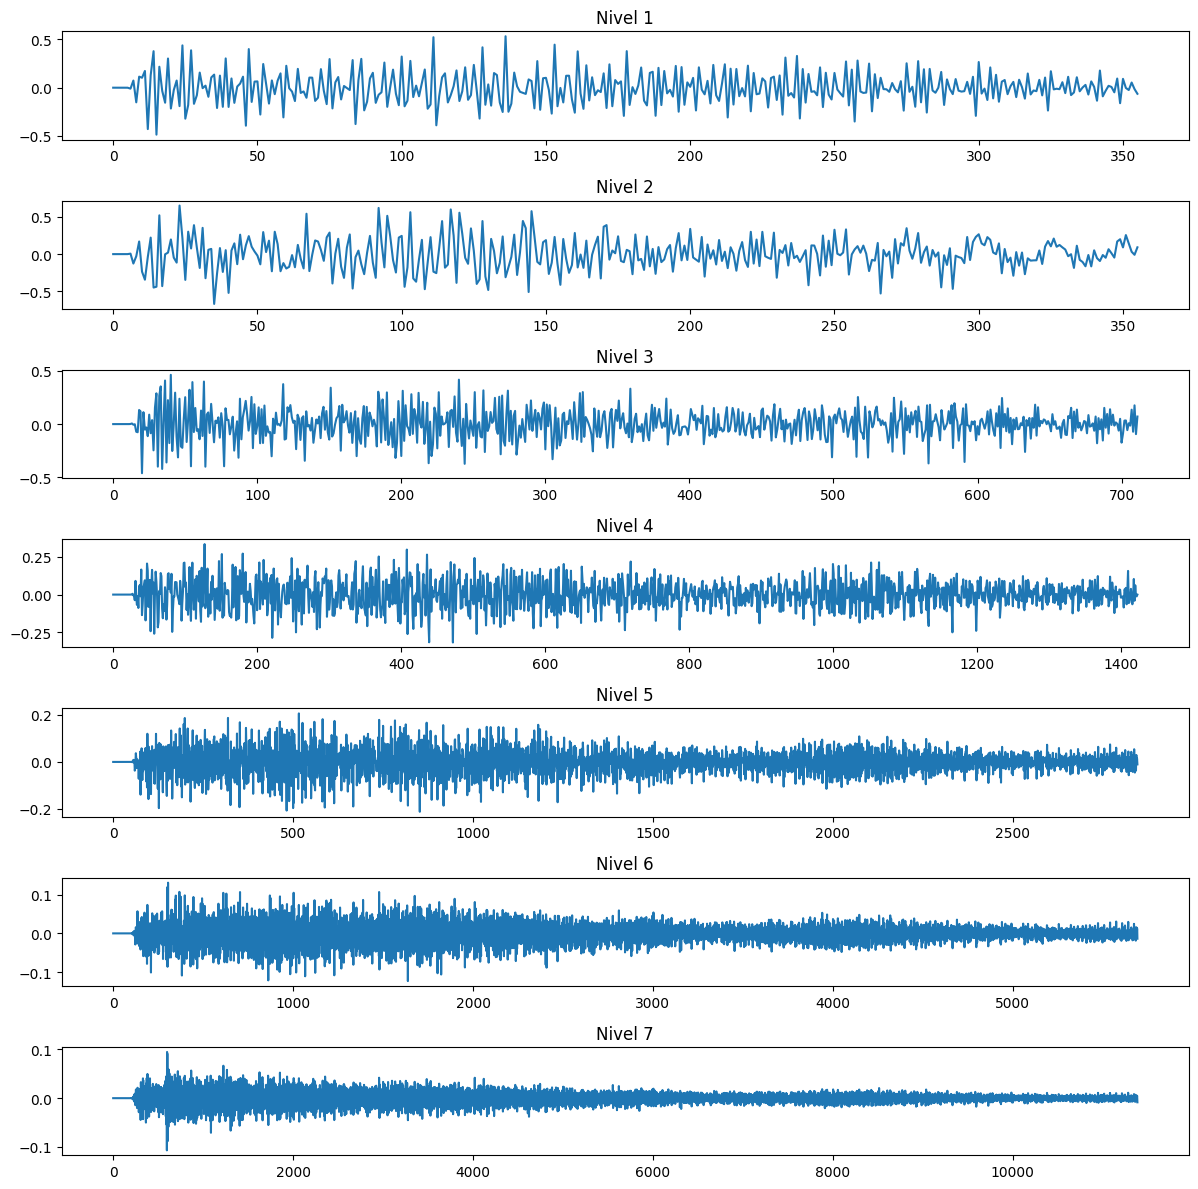

In [8]:
coeffs = pywt.wavedec(karaoke, 'db1', level=6)

# Visualización de la descomposición
fig, axs = plt.subplots(len(coeffs), 1, figsize=(12, 12))
for i, coeff in enumerate(coeffs):
    axs[i].plot(coeff)
    axs[i].set_title(f'Nivel {i+1}')
plt.tight_layout()
plt.show()

# El audio original contenia 20 segundos de la canción pero para poder obtener la grafica de Dynamic Time Warping se tuvo que acortar el audio a  segundo ya que en longitudes mas largas python arroja un error de que no habia memoria suficiente en el sistema para procesar la dimensioo de los datos que se estaban generando con una longitud de audio de 20s 

In [9]:
from dtw import *

Importing the dtw module. When using in academic works please cite:
  T. Giorgino. Computing and Visualizing Dynamic Time Warping Alignments in R: The dtw Package.
  J. Stat. Soft., doi:10.18637/jss.v031.i07.



<Axes: >

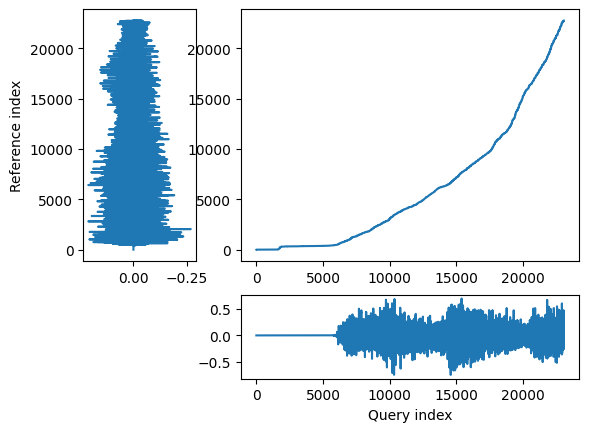

In [10]:
alignment = dtw(cancion, karaoke, keep_internals=True)

## Display the warping curve, i.e. the alignment curve
alignment.plot(type="threeway")